# A3b: Filtering  
Finn Hittson - fxh157  
CSDS 464  
Due: March 6th, 2023  

In [1]:
import A3b_fxh157 as a3b
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../464-A3a_fxh157_files/')
import A3a_fxh157 as a3a

sys.path.append('../464-A1b_fxh157_files/')
import A1b_fxh157 as a1b

## 1 Filtering

### 1a. A moving average filter

Part (A):  
$y_M[n]$ has the form
$$
y_M[n]=\frac{1}{M}\sum_{k=0}^{M-1}x[n-k]=\frac{1}{M}(x[n]+x[n-1]+\cdots+x[n-M+1]).
$$
$y_{M-1}[n-1]$ has the form
$$
y_{M-1}[n-1]=\frac{1}{M-1}\sum_{k=0}^{M-2}x[n-k-1]=\frac{1}{M-1}(x[n-1]+x[n-2]+\cdots+x[n-M+1]).
$$
Distribute the $\frac{1}{M}$ in $y_M[n]$.
$$
y_M[n]=\frac{x[n]}{M}+\frac{x[n-1]}{M}+\cdots+\frac{x[n-M+1]}{M}
$$
Set $1-\lambda=\frac{1}{M}$. This makes $\lambda=\frac{M-1}{M}$. Reformat the expression.
$$
y_M[n]=(1-\lambda)x[n]+\frac{1}{M}\sum_{k=0}^{M-1}x[n-k-1]=(1-\lambda)x[n]+y_M[n-1]
$$
Note that $\lambda y_{M-1}[n-1]=y_M[n-1]$ so making this substitution gives us the desired result.
$$
y_M[n]=\lambda y_{M-1}[n-1]+(1-\lambda)x[n]
$$

Part (B):  
Write the derived expression in the form of summations.
$$
\frac{1}{M}\sum_{k=0}^{M-1}x[n-k]=\lambda\frac{1}{M-1}\sum_{k=0}^{M-2}x[n-k-1]+(1-\lambda)x[n]
$$
Approximate $\frac{1}{M-1}\sum_{k=0}^{M-2}x[n-k-1]\approx\frac{1}{M}\sum_{k=0}^{M-1}x[n-k-1]$ since for large $M$ the difference will be negligible and simplify the expression.
$$
\frac{1}{M}\sum_{k=0}^{M-1}x[n-k]\approx\lambda\frac{1}{M}\sum_{k=0}^{M-1}x[n-k-1]+(1-\lambda)x[n]
$$
Let $y[n]=\frac{1}{M}\sum_{k=0}^{M-1}x[n-k]$ to get our desired result.
$$
y[n]=\lambda y[n-1]+(1-\lambda)x[n]
$$

Part (C):  
When $\lambda$ is increased, this causes $y[n-1]$ to become closer in value to $y[n]$ and has the opposite effect when $\lambda$ is decreased. 

### 1b. Implementation

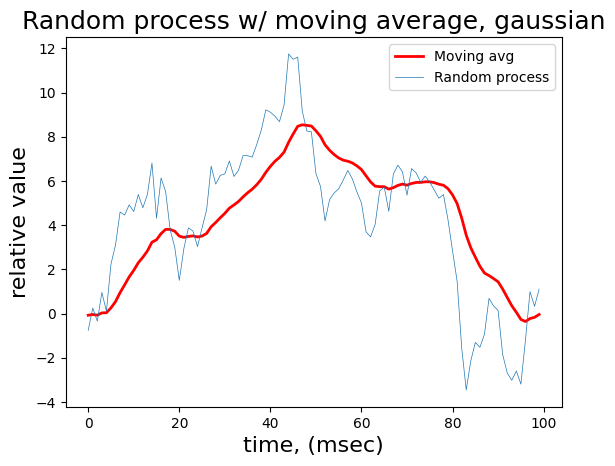

In [2]:
rand = a3b.randprocess(N=100, s=1.0, ntype='gaussian')
avg = a3b.movingavg(x=rand, l=0.9)
a3b.plot_movingavg(rand=rand, avg=avg, tunits="msec", title="Random process w/ moving average, gaussian")

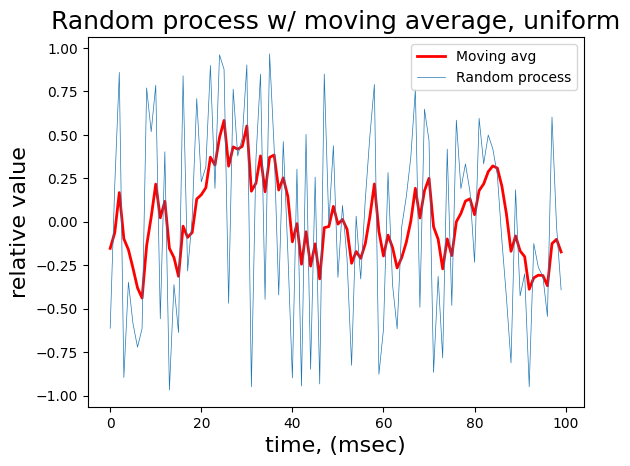

In [3]:
rand = a3b.randprocess(N=100, s=1.0, ntype='uniform')
avg = a3b.movingavg(x=rand, l=0.75)
a3b.plot_movingavg(rand=rand, avg=avg, tunits="msec", title="Random process w/ moving average, uniform")

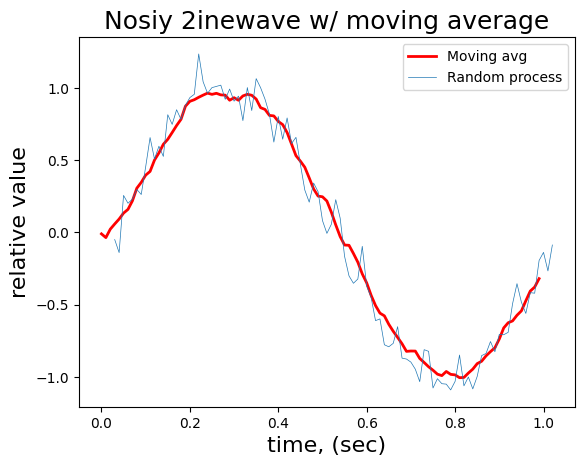

In [4]:
t, x, n = a3a.noisysignal(t=0, g=a1b.sinewave, fs=100, tau=0, T=1, s=0.1, tscale=1, f=1)
avg = a3b.movingavg(x+n, l=0.8)
a3b.plot_movingavg(rand=x+n, avg=avg, t=t, shift=0.03, title="Nosiy 2inewave w/ moving average", tunits="sec")

### 1c. System delay
There is a system delay because the moving average consistes of elements prior to the current location of the signal. Therefore for the moving average to reflect the signal's true location it needs the averaged elements to be centered on that specific location which only occurs in a later frame that is averaged. 

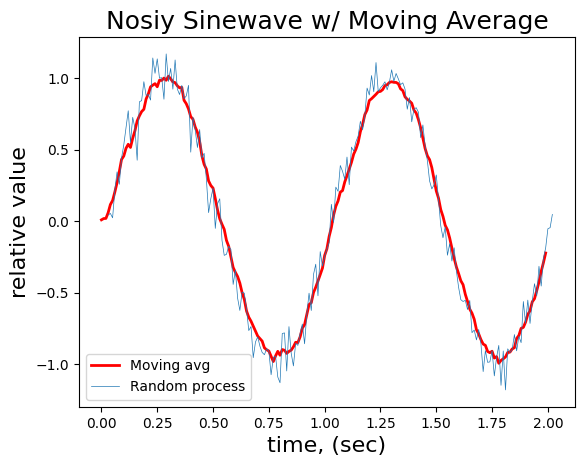

In [5]:
t, x, n = a3a.noisysignal(t=0, g=a1b.sinewave, fs=100, tau=0.0, T=2, s=0.1, tscale=1, f=1)
avg = a3b.movingavg(x+n, l=0.8)
a3b.plot_movingavg(rand=x+n, avg=avg, t=t, shift=0.03, title="Nosiy Sinewave w/ Moving Average", tunits="sec")

## 2. IRR Filters

### 2a. Implementation

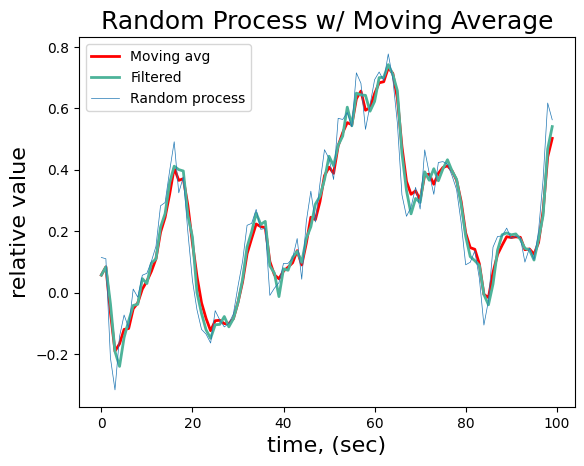

In [6]:
rand = a3b.randprocess(N=100, s=0.1)
avg = a3b.movingavg(x=rand, l=0.5)
a = [0.5]
b = [0.5, 0.5, 0.5]
filtered = a3b.filterIIR(x=rand, a=a, b=b)
a3b.plot_movingavg(rand=rand, avg=avg, filtered=filtered)

### 2b. First order low- and high-pass IIR filters

#### Low-pass filter

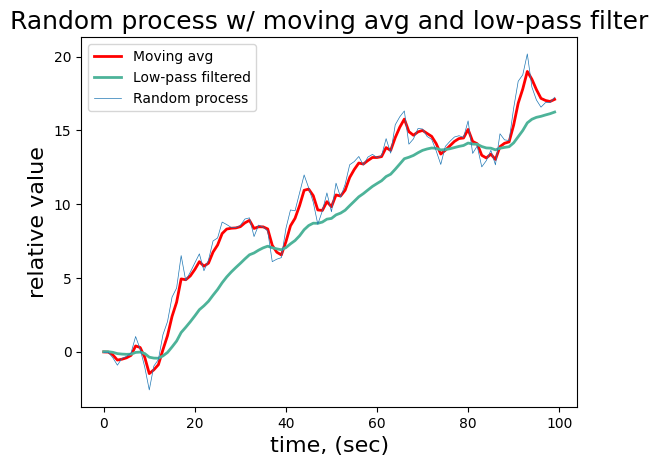

In [7]:
rand = a3b.randprocess(N=100, s=1, ntype="gaussian")
avg = a3b.movingavg(x=rand, l=0.5)
a = [-0.9]
b = [0.1]
filtered = a3b.filterIIR(x=rand, a=a, b=b)
a3b.plot_movingavg(rand=rand, avg=avg, filtered=filtered, title="Random process w/ moving avg and low-pass filter", label="Low-pass filtered")

#### High-pass filter

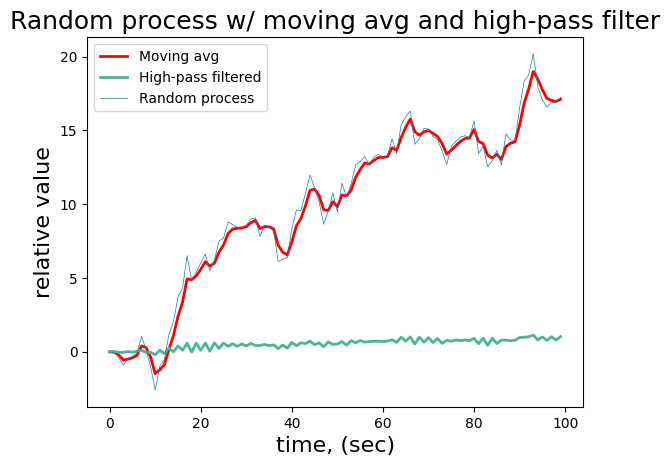

In [8]:
a = [0.9]
b = [0.1]
filtered = a3b.filterIIR(x=rand, a=a, b=b)
a3b.plot_movingavg(rand=rand, avg=avg, filtered=filtered, title="Random process w/ moving avg and high-pass filter", label="High-pass filtered")

The low pass filter only selects frequency from the input signal to keep. Therefore the resulting signal is composed only of low frequencies so it will result in a smooth signal without any sharp points. The plot above demonstrates this since it is a smoothed version of the noisy input signal which has a mixture of high and low frequencies. Keeping the lower frequencies makes a smoother signal since the period is longer. The high pass filter only keeps the higher frequencies so the output is a strainter light that is jagged which represents the parts of the signal that have high frequencies. This does not fit the curve well since the lower frequenceis dictate the overall shape of the signal and the higher frequencies dictate the more intricate details of the signal.

### 2c. Second order bandpass filters

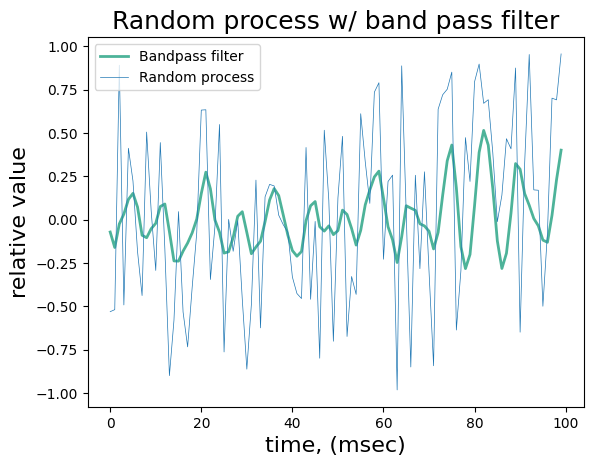

In [9]:
rand = a3b.randprocess(N=100, ntype="uniform")
avg = a3b.movingavg(x=rand, l=0.5)
a = [-1.265, 0.81]
b = [0.135]
filtered = a3b.filterIIR(x=rand, a=a, b=b)
a3b.plot_movingavg(rand=rand, filtered=filtered, title="Random process w/ band pass filter", tunits="msec", label="Bandpass filter")

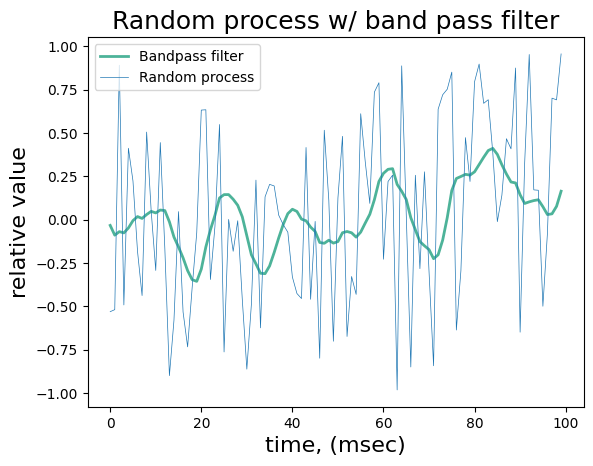

In [10]:
a = [-1.702, 0.81]
b = [0.063]
filtered = a3b.filterIIR(x=rand, a=a, b=b)
a3b.plot_movingavg(rand=rand, filtered=filtered, title="Random process w/ band pass filter", tunits="msec", label="Bandpass filter")

The two IIR difference equations are 
$$
y[n]=-1.265y[n-1]+0.81y[n-2]+0.135x[n]
$$
and
$$
y[n]=-1.702y[n-1]+0.81y[n-2]+0.063x[n].
$$
The main difference are the $b_0$ coefficients which are more than a magnitude apart. This difference is how the IIR filter selects high frequencies or low frequenceis. NEED TO FINISH

### 2d. Characterizing the filter response

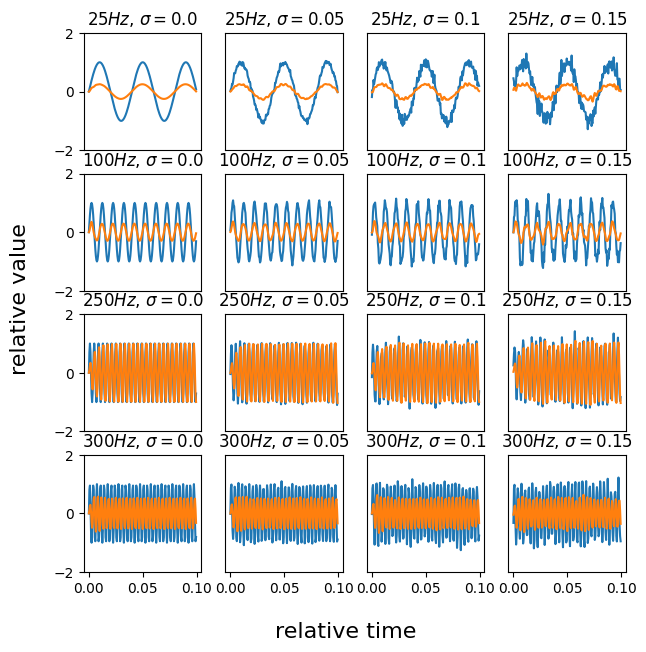

In [11]:
a = [-1.265, 0.81]
b = [0.135]
s = [0.0, 0.05, 0.1, 0.15]
f = [25, 100, 250, 300]

a3b.plot_filter_grid(g=a1b.sinewave, a=a, b=b, rows=4, cols=4, fs=2000, tau=0, T=0.1, tscale=1, s=s, f=f)

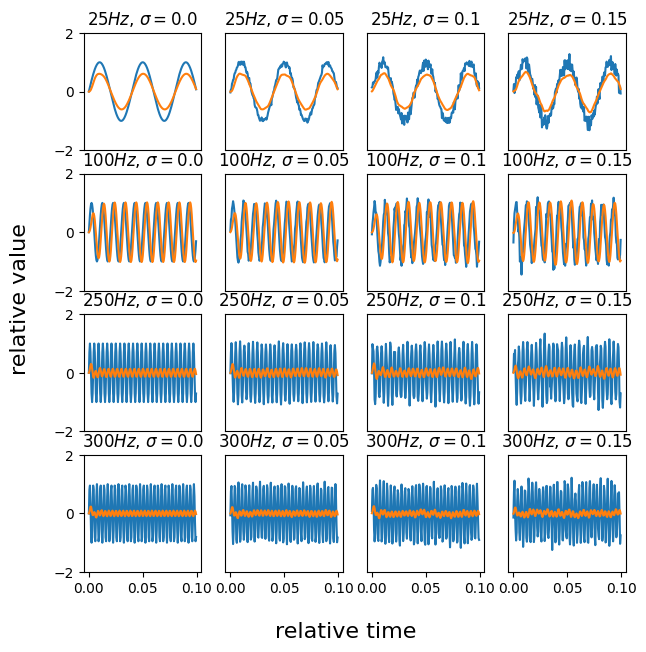

In [12]:
a = [-1.702, 0.81]
b = [0.063] 
s = [0.0, 0.05, 0.1, 0.15]
f = [25, 100, 250, 300]

a3b.plot_filter_grid(g=a1b.sinewave, a=a, b=b, rows=4, cols=4, fs=2000, tau=0, T=0.1, tscale=1, s=s, f=f)

The first set of bandpass filter coefficients are more effective at filtering the sinewaves with high frequencies. They lack the proper amplitude the represend the lower frequency sinewaves. These coefficients are also less susceptible to noise at higher frequencies and are most effective at a $250Hz$ sinewave. The second set of bandpass filter coefficients are more effective at filtering sinewaves with lower frequencies. They are particularly effective at $100Hz$ perfectly matching the sinweave in all noise environments. These coefficients are less susceptible to noise at lower frequencies but at higher frequenceis, the filtered output is not consistent and more spontaneous in relation to the noise.

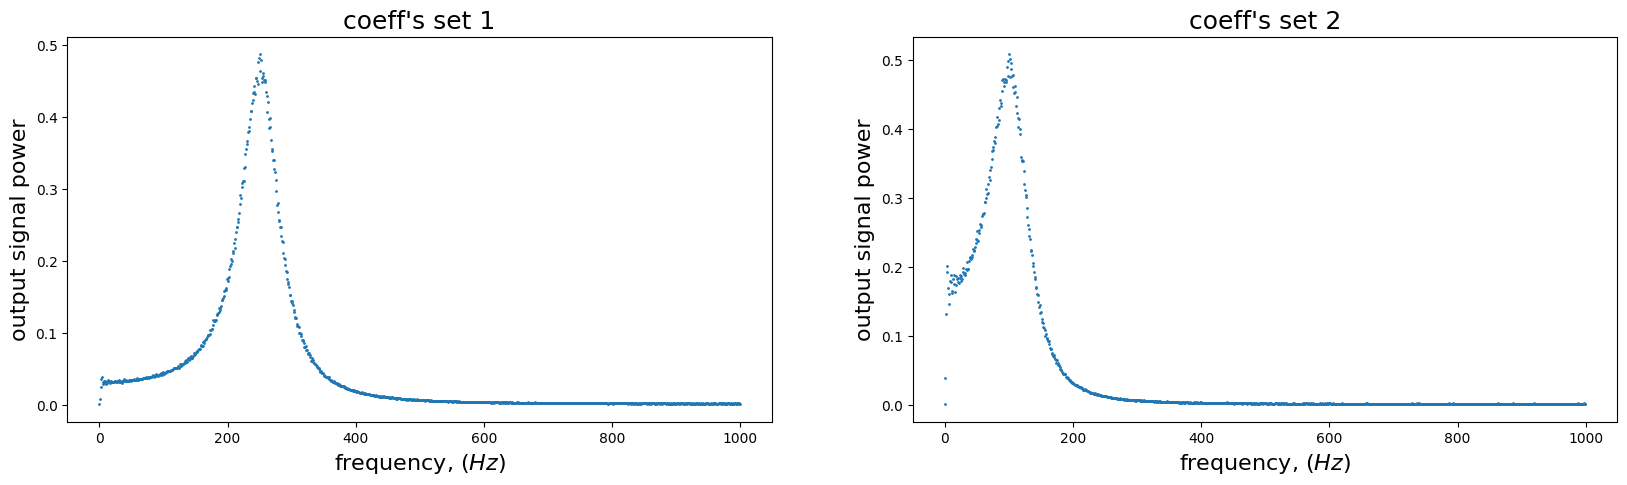

In [27]:
a = [-1.265, 0.81]
b = [0.135]
f0, p0 = a3b.freqpower(g=a1b.sinewave, a=a, b=b, fs=2000, tau=0, T=0.1, s=0.1, tscale=1)

a = [-1.702, 0.81]
b = [0.063] 
f1, p1 = a3b.freqpower(g=a1b.sinewave, a=a, b=b, fs=2000, tau=0, T=0.1, s=0.1, tscale=1)

fig, axs = plt.subplots(1,2,figsize=(20,5))

axs[0].scatter(f0, p0, s=1)
axs[0].set_xlabel("frequency, ($Hz$)", fontsize=16)
axs[0].set_ylabel("output signal power", fontsize=16)
axs[0].set_title("coeff's set 1", fontsize=18)

axs[1].scatter(f1, p1, s=1)
axs[1].set_xlabel("frequency, ($Hz$)", fontsize=16)
axs[1].set_ylabel("output signal power", fontsize=16)
axs[1].set_title("coeff's set 2", fontsize=18)

plt.show()

These plots indicate that the system best matches/filters the sinewave at a specific frequency. For the first set of coefficients it best filters the signal at $250Hz$ and the second set best filteres the signal at $100Hz$.

## 3. The impulse response function

### 3a. Deriving the impulse response function
$$
x[n]=\sum_{k=-\infty}^\infty x[k]\delta[n-k]
$$
$$
\mathcal{H}\left(x[n]\right)=\mathcal{H}\left(\sum_{k=-\infty}^\infty x[k]\delta[n-k]\right)
$$
$$
\mathcal{H}\left(x[n]\right)=\sum_{k=-\infty}^\infty \mathcal{H}\left(x[k]\delta[n-k]\right)
$$
Need linearity to factor out constant $x[k]$ from $\mathcal{H}\left(x[k]\delta[n-k]\right)$.
$$
\mathcal{H}\left(x[n]\right)=\sum_{k=-\infty}^\infty x[k]\mathcal{H}\left(\delta[n-k]\right)
$$
Need time invariance since the delta function operates with and without a time delay. Therefore $\mathcal{H}\left(\delta[n-k]\right)=h[n-k]$.
$$
\mathcal{H}\left(x[n]\right)=\sum_{k=-\infty}^\infty x[k]h[n-k]
$$
$$
h[n]=\begin{cases}
\text{undefined} & n = 0\\
0 & n \neq 0
\end{cases}
$$
We can predict the system response for an arbitrary input since the response at any time is equivalent to the input signal times the dirac delta function centered at that time as well. 

### 3b. Impulse responses

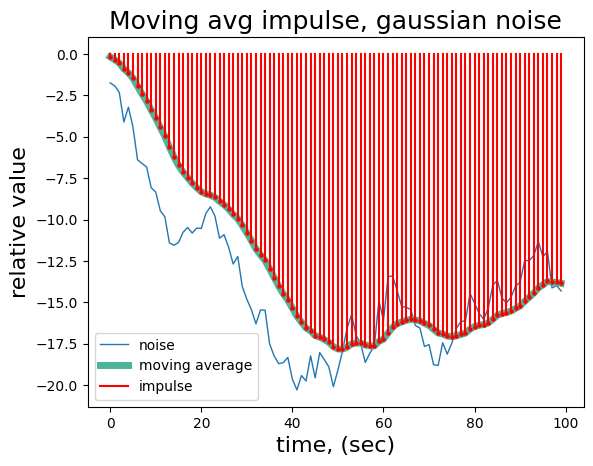

In [14]:
rand = a3b.randprocess(N=100, s=1.0, ntype='gaussian')
avg = a3b.movingavg(x=rand, l=0.9)
t, y = a3b.impulse(avg, step=1)
a3b.plot_impulse(t=t, y=y, t0=list(range(0,100)), x0=avg, rand=rand, title="Moving avg impulse, gaussian noise", label="moving average")

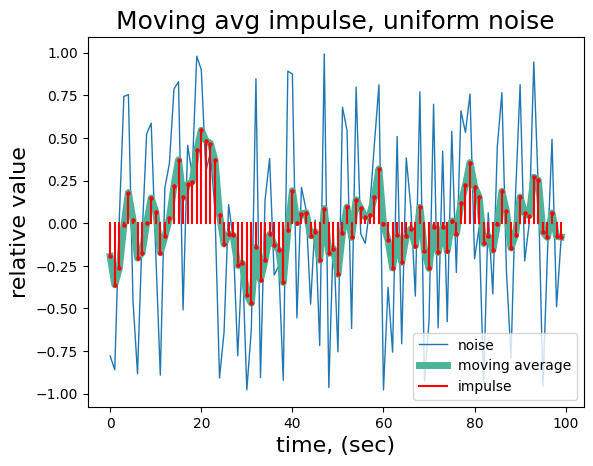

In [15]:
rand = a3b.randprocess(N=100, s=1.0, ntype='uniform')
avg = a3b.movingavg(x=rand, l=0.75)
t, y = a3b.impulse(avg, step=1)
a3b.plot_impulse(t=t, y=y, t0=list(range(0,100)), x0=avg, rand=rand, title="Moving avg impulse, uniform noise", label="moving average")

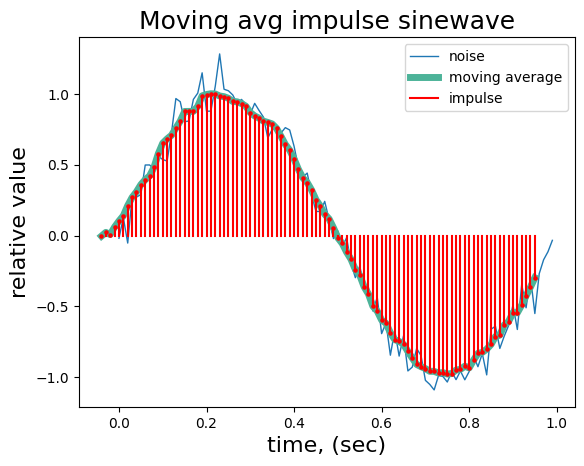

In [16]:
t0, x0, n0 = a3a.noisysignal(t=0, g=a1b.sinewave, fs=100, tau=0, T=1, s=0.1, tscale=1, f=1)
avg = a3b.movingavg(x0+n0, l=0.8)
t, y = a3b.impulse(avg, step=1)
a3b.plot_impulse(t=t/100, y=y, t0=t0, x0=avg, rand=x0+n0, shift=-0.04, title="Moving avg impulse sinewave", label="moving average")

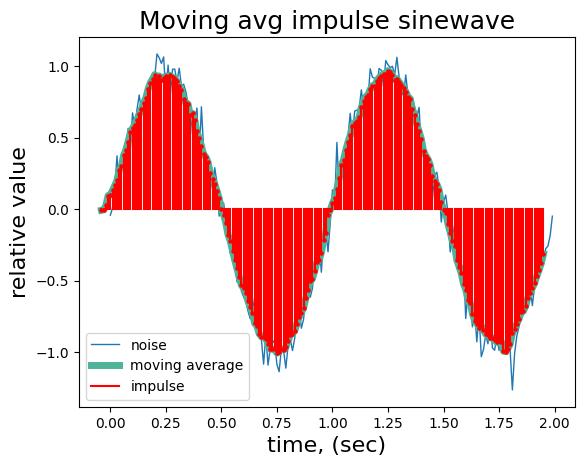

In [17]:
t0, x0, n0 = a3a.noisysignal(t=0, g=a1b.sinewave, fs=100, tau=0.0, T=2, s=0.1, tscale=1, f=1)
avg = a3b.movingavg(x0+n0, l=0.8)
#a3b.plot_movingavg(rand=x+n, avg=avg, t=t, shift=0.03, title="Nosiy Sinewave w/ Moving Average", tunits="sec")
t, y = a3b.impulse(avg, step=1)
a3b.plot_impulse(t=t/100, y=y, t0=t0, x0=avg, rand=x0+n0, shift=-0.04, title="Moving avg impulse sinewave", label="moving average")

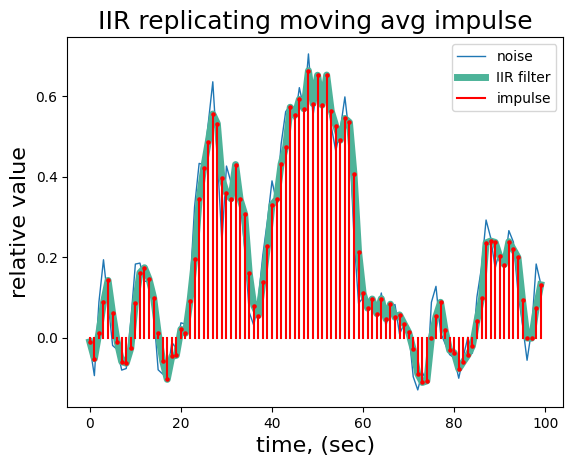

In [18]:
rand = a3b.randprocess(N=100, s=0.1)
a = [0.5]
b = [0.5, 0.5, 0.5]
filtered = a3b.filterIIR(x=rand, a=a, b=b)
#a3b.plot_movingavg(rand=rand, avg=avg, filtered=filtered)
t, y = a3b.impulse(filtered, step=1)
a3b.plot_impulse(t=t, y=y, t0=list(range(0,100)), x0=filtered, rand=rand, title="IIR replicating moving avg impulse", label="IIR filter")

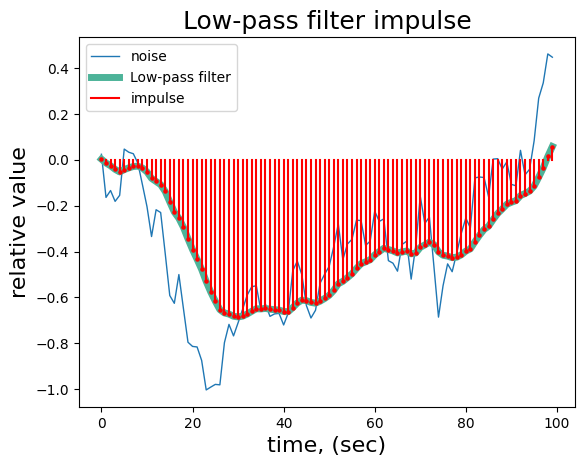

In [19]:
rand = a3b.randprocess(N=100, s=0.1, ntype="gaussian")
a = [-0.9]
b = [0.1]
filtered = a3b.filterIIR(x=rand, a=a, b=b)
t, y = a3b.impulse(filtered, step=1)
a3b.plot_impulse(t=t, y=y, t0=list(range(0,100)), x0=filtered, rand=rand, title="Low-pass filter impulse", label="Low-pass filter")

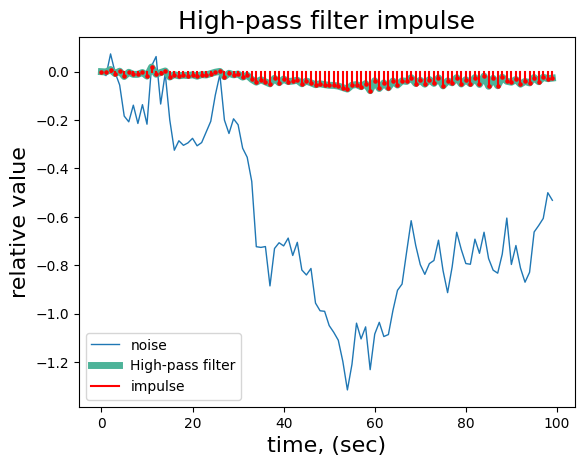

In [20]:
rand = a3b.randprocess(N=100, s=0.1, ntype="gaussian")
a = [0.9]
b = [0.1]
filtered = a3b.filterIIR(x=rand, a=a, b=b)
t, y = a3b.impulse(filtered, step=1)
a3b.plot_impulse(t=t, y=y, t0=list(range(0,100)), x0=filtered, rand=rand, title="High-pass filter impulse", label="High-pass filter")

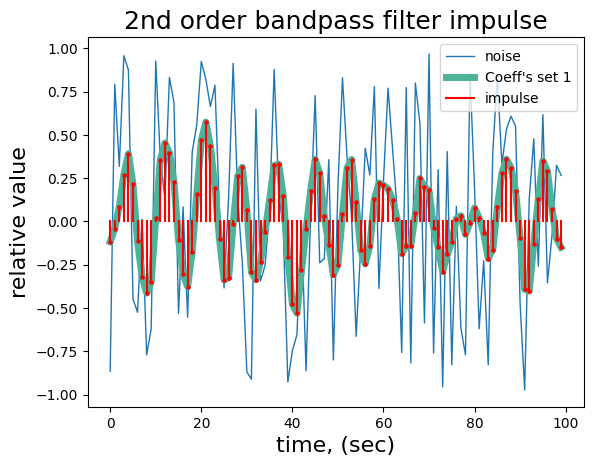

In [21]:
rand = a3b.randprocess(N=100, s=0.1, ntype="uniform")
a = [-1.265, 0.81]
b = [0.135]
filtered = a3b.filterIIR(x=rand, a=a, b=b)
#a3b.plot_movingavg(rand=rand, filtered=filtered)
t, y = a3b.impulse(filtered, step=1)
a3b.plot_impulse(t=t, y=y, t0=list(range(0,100)), x0=filtered, rand=rand, title="2nd order bandpass filter impulse", label="Coeff's set 1")

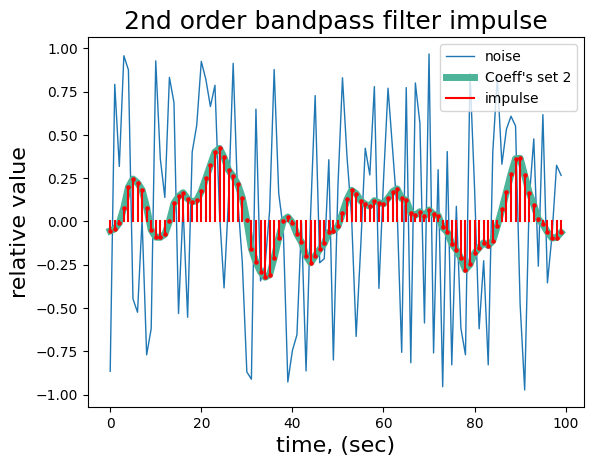

In [22]:
a = [-1.702, 0.81]
b = [0.063] 
filtered = a3b.filterIIR(x=rand, a=a, b=b)
#a3b.plot_movingavg(rand=rand, filtered=filtered)
t, y = a3b.impulse(filtered, step=1)
a3b.plot_impulse(t=t, y=y, t0=list(range(0,100)), x0=filtered, rand=rand, title="2nd order bandpass filter impulse", label="Coeff's set 2")

## 4. Filtering with convolution

### 4a. Implementing convolution 

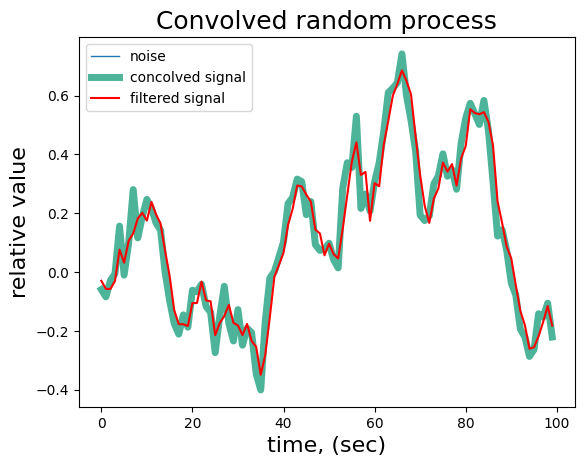

In [23]:
rand = a3b.randprocess(N=100, s=0.1)
#avg = a3b.movingavg(x=rand, l=0.5)
a = [0.5]
b = [0.5, 0.5, 0.5]
filtered = a3b.filterIIR(x=rand, a=a, b=b)
#a3b.plot_movingavg(rand=rand, avg=avg, filtered=filtered)
#t0, x0, n0 = a3a.noisysignal(t=0, g=a1b.sinewave, fs=2000, tau=0, T=0.02, s=0.1, tscale=1, f=100)
y = a3b.convolve(x=rand, h=[1], h0=0)
a3b.plot_convolution(t=list(range(100)), y=filtered, x0=y, t0=list(range(100)), rand=rand, title="Convolved random process", label1="concolved signal", label2="filtered signal")

### 4b. FIR filtering

In [24]:
t0, x0, n0 = a3a.noisysignal(t=0, g=a1b.sinewave, fs=2000, tau=0, T=0.1, s=0.1, tscale=1, f=100)
y = convolve(x=x0+n0, h=[0.5, 0], h0=0)
plot_impulse(t=t0, y=y, t0=t0, x0=x0+n0)

NameError: name 'convolve' is not defined

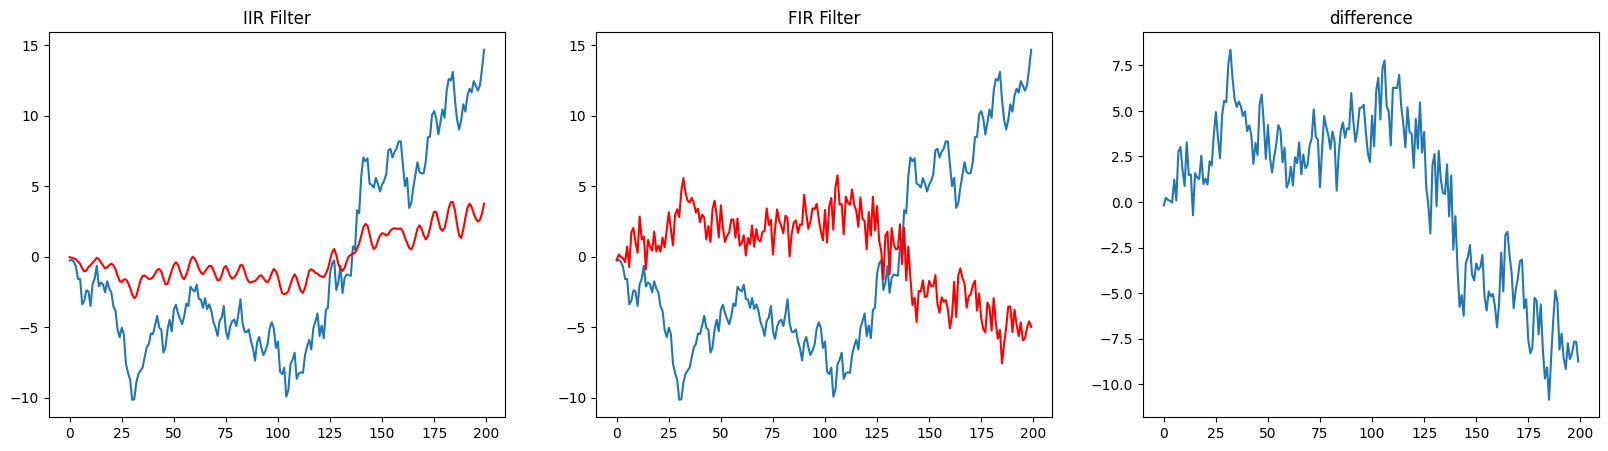

In [ ]:
x = a3b.randprocess(N=200, ntype="gaussian")
a = [-1.265, 0.81]
b = [0.135]
filtered = a3b.filterIIR(x=x, a=a, b=b)
t, y = impulse(filtered, fs=2000, tscale=1, f=100)

fig, axs = plt.subplots(1,3,figsize=(20,5))
axs[0].plot(list(range(0,len(x))), x, '#1f77b4')
axs[0].plot(list(range(0,len(x))), filtered, 'r')
axs[0].set_title("IIR Filter")

y = convolve(x=x, h=a, h0=1)
axs[1].plot(list(range(0,len(x))), x, '#1f77b4')
axs[1].plot(list(range(0,len(x))), y, 'r')
axs[1].set_title("FIR Filter")

axs[2].plot(list(range(0,len(x))), np.array(y) - np.array(filtered), '#1f77b4')
axs[2].set_title("difference")
plt.show()

### 4c. Using matched filters to detect signals in noise

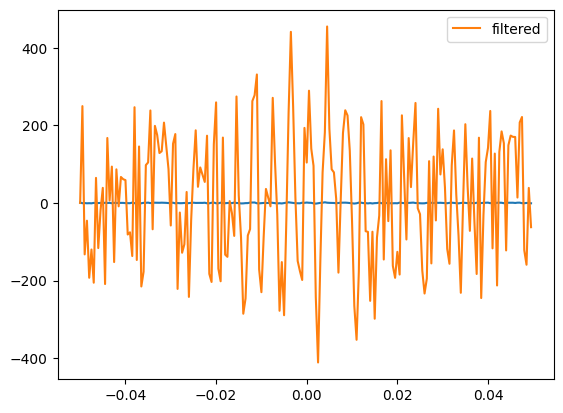

In [ ]:
t0, x0, n0 = a3a.noisysignal(t=-0.05, g=a1b.gabore, fs=2000, tau=0.0, T=0.05, s=0.1, ntype="uniform", tscale=1, f=250, sigma=3/250)
y = convolve(x=x0+n0, h=[250, 3/250], h0=1)
#plot_impulse(t=t0, y=y, t0=t0, x0=x0+n0)
plt.plot(t0, x0+n0)
plt.plot(t0, y, label="filtered")
plt.legend()
plt.show()

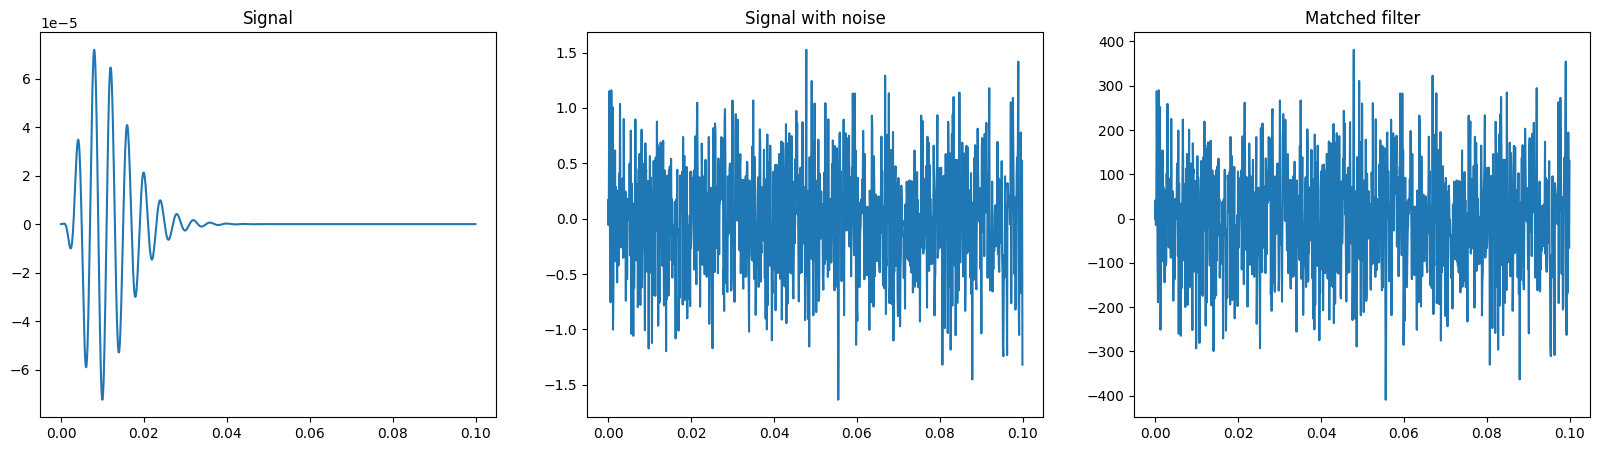

In [ ]:
t0, x0, n0 = a3a.noisysignal(t=0, g=a1b.gammatone, fs=10000, tau=0, T=0.1, s=0.5, ntype="gaussian", tscale=1, f=250)

fig, axs = plt.subplots(1,3,figsize=(20,5))
axs[0].plot(t0, x0, '#1f77b4')
axs[0].set_title("Signal")

axs[1].plot(t0, x0+n0, '#1f77b4')
axs[1].set_title("Signal with noise")

y = convolve(x=x0+n0, h=[250, 0.1], h0=1)
axs[2].plot(t0, y, '#1f77b4')
axs[2].set_title("Matched filter")
plt.show()